<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Web_scraping_Getting_started_with_BeautifulSoup_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A gentle introduction into the field of **Web Scraping**

> **Web scraping**, **web harvesting**, or **web data extraction** is data scraping used for extracting data from websites. Web scraping software may access the World Wide Web directly using the Hypertext Transfer Protocol, or through a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis. ([Wikipedia](https://en.wikipedia.org/wiki/Web_scraping))
---

Web scraping in Python is getting easy with **Beautifulsoup** (bs4).  


> Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree. ([pypi.org](https://pypi.org/project/beautifulsoup4/))  

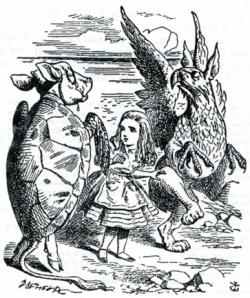






More information about bs4 & Beautifulsoup : [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)


## 1 Objectives
Web scraping in Python is getting easy with Beautifulsoup and the following process may be applied to retrieve data :
- Make a request to the targeted url
- Transform the content of the request into a Beautifulsoup' object, named `soup`
- Navigate through the soup
- Identify and retrieve the needed data

##2 Make a request




###2.1 Import the librairies

In [1]:
import requests # access to url
from bs4 import BeautifulSoup # extract data from url
import pandas as pd #data wrangling

###2.2 A first request
The first step consists in making a request to the targeted url.  
In the following example we are going to extract main news of Le Monde, a French online newspaper.

In [2]:
url = 'https://www.lemonde.fr/'
print(url)

req = requests.get(url)
print(req)

https://www.lemonde.fr/
<Response [200]>


The request has several status :
- 1xx informational response – the request was received, continuing process
- 2xx successful – the request was successfully received, understood, and accepted
- 3xx redirection – further action needs to be taken in order to complete the request
- 4xx client error – the request contains bad syntax or cannot be fulfilled
- 5xx server error – the server failed to fulfil an apparently valid request

More information on [Wikipedia](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes).

###2.3 Extract content
When the request is successful, extract content of the url is made easy from the `request` object.

In [3]:
req.text

'         <!DOCTYPE html> <html lang="fr" prefix="og: http://ogp.me/ns#"> <head> <meta charset="UTF-8"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"> <meta name="referrer" content="no-referrer-when-downgrade">   <script class="_iub_cs_activate" type="text/plain" data-iub-purposes="4" data-suppressedsrc="//www.lemonde.fr/bucket/4228381471a1b6cbe0a94a50f883de68699ee2de/js/chartbeatMab.bundle.js" async="1"></script>   <link rel="manifest" href="/manifest.json">  <script>\nif(sessionStorage.fontsFirst&&sessionStorage.fontsLast&&\'fonts\'in document){document.documentElement.classList.add(\'fonts-loaded\');}\nif(typeof Promise===\'undefined\'){document.documentElement.classList.add(\'fonts-loaded\');}</script>   <link rel="preload" href="/bucket/4228381471a1b6cbe0a94a50f883de68699ee2de/css/icons.css" as="style" onload="this.onload=null;this.rel=\'stylesheet\'"> <noscript><link rel="stylesheet" hre

###2.4 Other information
Many useful information is available from the `request` object, for instance :

In [4]:
print("Request' status : ", req.status_code)
print("Request' encoding : ", req.encoding)
print("Request' connection : ", req.connection)
print("Request' headers : ", req.headers)
print("Request' content : ", req.content)

Request' status :  200
Request' encoding :  UTF-8
Request' connection :  <requests.adapters.HTTPAdapter object at 0x7f6974a5e1d0>
Request' headers :  {'Connection': 'keep-alive', 'Content-Type': 'text/html; charset=UTF-8', 'X-Protected-By': 'Sqreen', 'Set-Cookie': 'critical-home-free-desktop=b3fca53b56ca63b483a3f84ebd690516; expires=Sun, 10-Jan-2021 07:58:52 GMT; Max-Age=2592000; path=/; secure', 'X-Frame-Options': 'SAMEORIGIN', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Via': '1.1 google, 1.1 varnish, 1.1 varnish', 'Cache-Control': 'private, max-age=0', 'Accept-Ranges': 'bytes', 'Date': 'Fri, 11 Dec 2020 07:58:52 GMT', 'X-Served-By': 'cache-cdg20738-CDG, cache-wdc5553-WDC', 'X-Cache': 'MISS, MISS', 'X-Cache-Hits': '0, 0', 'X-Timer': 'S1607673533.655418,VS0,VE143', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31557600', 'transfer-encoding': 'chunked'}
Request' content :  b'         <!DOCTYPE html> <html lang="fr" prefix="og: http://ogp.me/ns#"

The `.content` attribute provides the full web page of the url.

###2.5 Troubleshootings
Let's imagine the web server requires more appropriate requets for accessing to the url.  
In that case a simple request, as made before, may not be successful.

###2.5.1 Error 406
The web server returns the "Error 406", that means :

> 406 Not Acceptable.  
The requested resource is capable of generating only content not acceptable according to the Accept headers sent in the request. (Source : [Wikipedia](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes))


In [5]:
url_406="https://chucknorrisfacts.net/top-100"
print(url_406)

req = requests.get(url_406)
print(req)
print(req.content)

https://chucknorrisfacts.net/top-100
<Response [406]>
b'<head><title>Not Acceptable!</title></head><body><h1>Not Acceptable!</h1><p>An appropriate representation of the requested resource could not be found on this server. This error was generated by Mod_Security.</p><script defer src="https://static.cloudflareinsights.com/beacon.min.js" data-cf-beacon=\'{"rayId":"5ffda9bd29d426a3","r":1,"version":"2020.12.0","si":10}\'></script>\n</body></html>'



A workaround consists in defining an header in the request in order to authenticate the user with a user agent.

In [6]:
url_406="https://chucknorrisfacts.net/top-100"
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; rv:55.0) Gecko/20100101 Firefox/55.0',
}

req_406 = requests.get(url, headers=headers)
print(req)
print(req.content)

<Response [406]>
b'<head><title>Not Acceptable!</title></head><body><h1>Not Acceptable!</h1><p>An appropriate representation of the requested resource could not be found on this server. This error was generated by Mod_Security.</p><script defer src="https://static.cloudflareinsights.com/beacon.min.js" data-cf-beacon=\'{"rayId":"5ffda9bd29d426a3","r":1,"version":"2020.12.0","si":10}\'></script>\n</body></html>'


##3 Let's play with Beautifulsoup
###3.1 Make a soup
Transform the content of the request into a Beautifulsoup' object, named `soup`.  
**Make a (beautiful) soup** : get the content from your url.

In [7]:
req = requests.get('https://www.lemonde.fr/')
soup = BeautifulSoup(req.text, "lxml")
soup

<!DOCTYPE html>
<html lang="fr" prefix="og: http://ogp.me/ns#"> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/> <meta content="no-referrer-when-downgrade" name="referrer"/> <script async="1" class="_iub_cs_activate" data-iub-purposes="4" data-suppressedsrc="//www.lemonde.fr/bucket/4228381471a1b6cbe0a94a50f883de68699ee2de/js/chartbeatMab.bundle.js" type="text/plain"></script> <link href="/manifest.json" rel="manifest"/> <script>
if(sessionStorage.fontsFirst&&sessionStorage.fontsLast&&'fonts'in document){document.documentElement.classList.add('fonts-loaded');}
if(typeof Promise==='undefined'){document.documentElement.classList.add('fonts-loaded');}</script> <link as="style" href="/bucket/4228381471a1b6cbe0a94a50f883de68699ee2de/css/icons.css" onload="this.onload=null;this.rel='stylesheet'" rel="preload"/> <noscript><link href="/bucket/4228381471a1b6cbe0a94a50f883d

###3.2 The tree structure
The tree structure is easily available from the soup.

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="fr" prefix="og: http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta content="no-referrer-when-downgrade" name="referrer"/>
  <script async="1" class="_iub_cs_activate" data-iub-purposes="4" data-suppressedsrc="//www.lemonde.fr/bucket/4228381471a1b6cbe0a94a50f883de68699ee2de/js/chartbeatMab.bundle.js" type="text/plain">
  </script>
  <link href="/manifest.json" rel="manifest"/>
  <script>
   if(sessionStorage.fontsFirst&&sessionStorage.fontsLast&&'fonts'in document){document.documentElement.classList.add('fonts-loaded');}
if(typeof Promise==='undefined'){document.documentElement.classList.add('fonts-loaded');}
  </script>
  <link as="style" href="/bucket/4228381471a1b6cbe0a94a50f883de68699ee2de/css/icons.css" onload="this.onload=null;this.rel='stylesheet'" rel="preload"/>
  <noscript>
   <link href="/buck

###3.3 The title of the page
The title has a dedicated attribute "title".

In [9]:
print(soup.title)
print(soup.title.string)

<title>Le Monde.fr - Actualités et Infos en France et dans le monde</title>
Le Monde.fr - Actualités et Infos en France et dans le monde


##4 Identify the required data
Let's imagine we want to retrieve all articles available on the main page and not only the main article.  
By navigating on the web page or the tree structure, it's pretty easy to identify that the requested articles come from the class `class="article article--runner old__article-runner"`.  


###4.1 Retrieve one article
The `find()` method allows to extract the first data that meets the expectations.

In [10]:
soup.find("div", class_="article article--runner old__article-runner")

<div class="article article--runner old__article-runner"> <a href="https://www.lemonde.fr/international/article/2020/12/11/l-administration-trump-accelere-les-executions-federales-avant-la-passation-de-pouvoirs_6062981_3210.html"> <div class="article__media-container "> <picture class="article__media"> <img alt="Des opposants à la peine de mort protestent contre l’exécution de Brandon Bernard à Terre Haute, dans l’Indiana, le 10 décembre." data-src="https://img.lemde.fr/2020/12/11/74/0/3922/2614/384/0/60/0/da7ae11_359027734-390451.jpg" data-srcset="https://img.lemde.fr/2020/12/11/74/0/3922/2614/384/0/60/0/da7ae11_359027734-390451.jpg 198w, https://img.lemde.fr/2020/12/11/74/0/3922/2614/114/0/95/0/da7ae11_359027734-390451.jpg 114w" height="132" width="192"/> <noscript><img alt="Des opposants à la peine de mort protestent contre l’exécution de Brandon Bernard à Terre Haute, dans l’Indiana, le 10 décembre." height="132" src="https://img.lemde.fr/2020/12/11/74/0/3922/2614/192/0/75/0/da7ae1

####4.1.1 The title

In [11]:
print(soup.find("div", class_="article article--runner old__article-runner").find("p", class_="article__title"))
print(soup.find("div", class_="article article--runner old__article-runner").find("p", class_="article__title").string)

<p class="article__title">L’administration Trump accélère les exécutions fédérales avant la passation de pouvoirs</p>
L’administration Trump accélère les exécutions fédérales avant la passation de pouvoirs


####4.1.2 The description

In [12]:
print(soup.find("div", class_="article article--runner old__article-runner").find("p", class_="article__desc"))
print(soup.find("div", class_="article article--runner old__article-runner").find("p", class_="article__desc").string)

<p class="article__desc">Brandon Bernard, tué jeudi soir par injection létale, est le deuxième condamné exécuté pendant l’interrègne entre les présidents, du jamais vu depuis 1889.</p>
Brandon Bernard, tué jeudi soir par injection létale, est le deuxième condamné exécuté pendant l’interrègne entre les présidents, du jamais vu depuis 1889.


####4.1.3 The link

In [13]:
print(soup.find("div", class_="article article--runner old__article-runner").find("a"))
print(soup.find("div", class_="article article--runner old__article-runner").find("a").get('href'))

<a href="https://www.lemonde.fr/international/article/2020/12/11/l-administration-trump-accelere-les-executions-federales-avant-la-passation-de-pouvoirs_6062981_3210.html"> <div class="article__media-container "> <picture class="article__media"> <img alt="Des opposants à la peine de mort protestent contre l’exécution de Brandon Bernard à Terre Haute, dans l’Indiana, le 10 décembre." data-src="https://img.lemde.fr/2020/12/11/74/0/3922/2614/384/0/60/0/da7ae11_359027734-390451.jpg" data-srcset="https://img.lemde.fr/2020/12/11/74/0/3922/2614/384/0/60/0/da7ae11_359027734-390451.jpg 198w, https://img.lemde.fr/2020/12/11/74/0/3922/2614/114/0/95/0/da7ae11_359027734-390451.jpg 114w" height="132" width="192"/> <noscript><img alt="Des opposants à la peine de mort protestent contre l’exécution de Brandon Bernard à Terre Haute, dans l’Indiana, le 10 décembre." height="132" src="https://img.lemde.fr/2020/12/11/74/0/3922/2614/192/0/75/0/da7ae11_359027734-390451.jpg" width="192"/></noscript> </picture

###4.2 Extract all articles
Now the `find_all()` method is applied and allows to extract all data that meets the expectations.

####4.2.1 The title

In [14]:
for div in soup.find_all("div", class_="article article--runner old__article-runner"):
  title = div.find("p", class_="article__title").string
  print(title)

L’administration Trump accélère les exécutions fédérales avant la passation de pouvoirs
Football : Mediapro prêt à un retrait, mais pose des conditions
Un nouveau film de la saga « Star Wars » annoncé pour 2023


####4.2.2 The description

In [15]:
for div in soup.find_all("div", class_="article article--runner old__article-runner"):
  desc = div.find("p", class_="article__desc").string
  print(desc)

Brandon Bernard, tué jeudi soir par injection létale, est le deuxième condamné exécuté pendant l’interrègne entre les présidents, du jamais vu depuis 1889.
Contrairement à ce que son fondateur, Jaume Roures, affirmait en octobre, le groupe espagnol est disposé à cesser la diffusion des matchs du championnat de France. Mais à bon prix, pour lui.
Le nouvel opus de la saga mythique s’appellera « Rogue Squadron » et sera réalisé par Patty Jenkins, la première femme aux commandes d’un long-métrage de la franchise.


####4.2.3 The link

In [16]:
for div in soup.find_all("div", class_="article article--runner old__article-runner"):
  link = div.find("a").get('href')
  print(link)

https://www.lemonde.fr/international/article/2020/12/11/l-administration-trump-accelere-les-executions-federales-avant-la-passation-de-pouvoirs_6062981_3210.html
https://www.lemonde.fr/sport/article/2020/12/11/football-mediapro-pret-a-un-retrait-mais-pose-des-conditions_6062977_3242.html
https://www.lemonde.fr/culture/article/2020/12/11/un-nouveau-film-de-la-saga-star-wars-annonce-pour-fin-2023_6062991_3246.html


## 5 Other requirement
Let's imagine we want to extract all articles available on the main page, whatever their types : main, runner, older, etc.  
Another strategy is needed here for a such data extraction.  

### 5.1 The articles
Articles are tagged as `class="article__title"`.  
So this may be our starting point.

In [17]:
soup.find(class_="article__title").get_text()

# Equivalent
#soup.find(class_="article__title").string

'Les déboires d’Areva en Finlande vont (encore) coûter plus de 600\xa0millions d’euros à l’Etat'

### 5.2 The links
Starting from the article, the link is available from their parent `a`.

In [18]:
soup.find(class_="article__title").parent

<a class="article article--nav" data-suggestion="" href="https://www.lemonde.fr/economie/article/2020/12/10/les-deboires-d-areva-en-finlande-vont-encore-couter-plus-de-600-millions-d-euros-a-l-etat_6062944_3234.html"> <div class="article__media-container"> <picture class="article__media"> <img alt="A la centrale nucléaire d’Olkiluoto, en Finlande, en août 2015." class="teaser__media teaser__media--nav js-media-nav" data-lazy="https://img.lemde.fr/2020/12/10/0/4/4920/3280/180/0/95/0/f3c7520_307451884-olkiluoto.jpg" data-lazy-retina="https://img.lemde.fr/2020/12/10/0/4/4920/3280/360/0/95/0/f3c7520_307451884-olkiluoto.jpg 2x" height="120" width="180"/> <noscript><img alt="A la centrale nucléaire d’Olkiluoto, en Finlande, en août 2015." height="120" src="https://img.lemde.fr/2020/12/10/0/4/4920/3280/180/0/95/0/f3c7520_307451884-olkiluoto.jpg" srcset="https://img.lemde.fr/2020/12/10/0/4/4920/3280/360/0/95/0/f3c7520_307451884-olkiluoto.jpg 2x" width="180"/></noscript> </picture> </div> <div 

And now, from the parent the `href` tag is easily available.

In [19]:
soup.find(class_="article__title").parent.get('href')

'https://www.lemonde.fr/economie/article/2020/12/10/les-deboires-d-areva-en-finlande-vont-encore-couter-plus-de-600-millions-d-euros-a-l-etat_6062944_3234.html'

###5.3 Extract all articles
Now the `find_all()` method is applied and allows to extract all data that meets the expectations.

In [20]:
title = []
link = []

for article in soup.find_all(class_="article__title"):
  # Extract each item
  title_temp = article.get_text()
  link_temp = article.parent.get('href')

  # Store items in list
  title.append(title_temp)
  link.append(link_temp)

### 5.4 Store articles in dataframe
For a better storing and readability, dataframe is a good data structure.

In [21]:
data = {'Title': title, 'Web_link': link}
df = pd.DataFrame(data)
df

,Title,Web_link
0,Les déboires d’Areva en Finlande vont (encore)...,https://www.lemonde.fr/economie/article/2020/1...
1,"L’enjeu pour l’Europe, ne pas rater la prochai...",https://www.lemonde.fr/economie/article/2020/1...
2,« Le Royaume-Uni se prépare à une négociation ...,https://www.lemonde.fr/economie/article/2020/1...
3,Climat : « C’est maintenant que nous avons bes...,https://www.lemonde.fr/idees/article/2020/12/1...
4,Comprendre le déclin de la démocratie en Turqu...,https://www.lemonde.fr/proche-orient/video/201...
...,...,...
191,Dialogue avec la rédaction du « Monde » en vis...,https://www.lemonde.fr/actualite-medias/articl...
192,Immobilier : le marché des grands appartements...,https://www.lemonde.fr/argent/article/2020/12/...
193,"Travailleurs non salariés, plus que quelques j...",https://www.lemonde.fr/argent/article/2020/12/...
194,Confier plus de pouvoirs aux copropriétaires :...,https://www.lemonde.fr/argent/article/2020/12/...


## Exercices

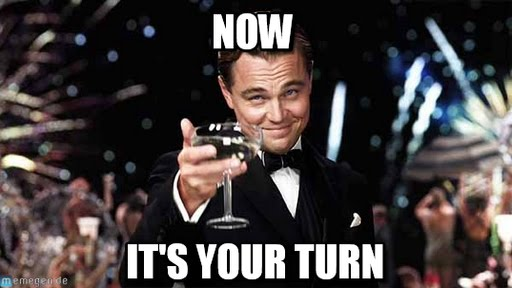

The goal of this exercice is to extract useful information for the a web page dedicated to cinema's news.  
Useful data is :  
- Article' title
- Article' description
- Article' image
- Article' web link  
  
And useful data may be stored in a dataframe of course :) !

In [22]:
# Your code here
url_cinema = "https://www.lemonde.fr/cinema/"

## Ressources
- [Beautifulsoup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.html?highlight=href#)
- Tutorial [Real Python](https://realpython.com/beautiful-soup-web-scraper-python/)



---
Did you love it ? [Please visit my website](http://www.dcid-consulting.fr/) and lets' get in touch for special needs : consultancy, dedicated training, cut-in-the-edge development, etc.  
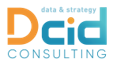Data science | Machine learning | Data analytics | Dataviz  